In [197]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.cluster import KMeans
from matplotlib import style
import pickle

In [198]:
df = pd.read_excel("data/cleaned_data.xlsx",index_col=[0])

In [199]:
df.head()

,BookingID_Date,Org_lat_lon,Des_lat_lon,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Planned_ETA,actual_eta
148,2020-08-26 12:03:46.000,"18.750621,73.87719","12.930429,79.931163",2020-08-28 12:15:10,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,390.500000,1,Maharashtra,Tamil Nadu,913.711784,2020-08-30 16:03:46.000,2020-08-28 12:48:07.380
149,2020-08-27 15:21:48.570,"12.8390,79.9540","12.8390,79.9540",2020-08-28 11:35:40,12.768090,80.026660,2020-08-27 15:21:06,2020-08-27 15:21:54.947,406.500000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 19:21:48.570,2020-08-28 12:13:51.543
150,2020-08-27 14:22:17.833,"12.8390,79.9540","12.8390,79.9540",2020-08-28 11:25:38,12.835262,79.952533,2020-08-27 14:21:21,2020-08-27 14:22:25.037,405.750000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 18:22:17.833,2020-08-28 11:33:19.043
151,2020-08-28 00:32:20.523,"12.8390,79.9540","12.8390,79.9540",2020-08-28 11:25:37,12.839172,79.951355,2020-08-28 00:31:41,2020-08-28 00:32:24.213,396.916667,1,Tamil Nadu,Tamil Nadu,0.000000,2020-09-01 04:32:20.523,2020-08-28 11:31:29.780
152,2020-08-26 09:55:08.000,"22.961777,72.094219","12.786517,79.975221",2020-08-28 08:35:08,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,477.250000,1,Gujarat,Tamil Nadu,1401.232229,2020-08-30 13:55:08.000,2020-08-29 07:09:41.173


In [200]:
# split column and add new columns to df
df[['Orgin_lat','Orgin_lon']] = df['Org_lat_lon'].str.split(',', expand=True)
df[['Destination_lat','Destination_lon']] = df['Des_lat_lon'].str.split(',', expand=True)

df.drop(columns=["Org_lat_lon","Des_lat_lon"], inplace=True)
# display the dataframe
df

,BookingID_Date,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Planned_ETA,actual_eta,Orgin_lat,Orgin_lon,Destination_lat,Destination_lon
148,2020-08-26 12:03:46.000,2020-08-28 12:15:10,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,390.500000,1,Maharashtra,Tamil Nadu,913.711784,2020-08-30 16:03:46.000,2020-08-28 12:48:07.380,18.750621,73.87719,12.930429,79.931163
149,2020-08-27 15:21:48.570,2020-08-28 11:35:40,12.768090,80.026660,2020-08-27 15:21:06,2020-08-27 15:21:54.947,406.500000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 19:21:48.570,2020-08-28 12:13:51.543,12.8390,79.9540,12.8390,79.9540
150,2020-08-27 14:22:17.833,2020-08-28 11:25:38,12.835262,79.952533,2020-08-27 14:21:21,2020-08-27 14:22:25.037,405.750000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 18:22:17.833,2020-08-28 11:33:19.043,12.8390,79.9540,12.8390,79.9540
151,2020-08-28 00:32:20.523,2020-08-28 11:25:37,12.839172,79.951355,2020-08-28 00:31:41,2020-08-28 00:32:24.213,396.916667,1,Tamil Nadu,Tamil Nadu,0.000000,2020-09-01 04:32:20.523,2020-08-28 11:31:29.780,12.8390,79.9540,12.8390,79.9540
152,2020-08-26 09:55:08.000,2020-08-28 08:35:08,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,477.250000,1,Gujarat,Tamil Nadu,1401.232229,2020-08-30 13:55:08.000,2020-08-29 07:09:41.173,22.961777,72.094219,12.786517,79.975221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2020-08-08 15:10:45.000,2020-08-14 13:45:10,21.067802,72.978950,2020-08-08 15:10:45,2020-08-15 02:40:21.237,1044.000000,0,Karnataka,Rajasthan,1573.480756,2020-08-09 23:53:10.000,2020-08-15 02:40:21.237,12.722686,77.676518,26.2389,73.0243
1355,2020-08-08 15:10:44.000,2020-08-14 14:25:12,12.966213,77.582370,2020-08-08 15:10:44,2020-08-15 01:04:01.580,1202.416667,0,Karnataka,Telangana,549.735797,2020-08-09 02:11:16.000,2020-08-15 01:04:01.580,12.722686,77.676518,17.603892,78.629944
1357,2020-08-06 21:25:41.000,2020-08-10 19:35:12,17.383795,78.474892,2020-08-06 21:25:41,2020-08-14 16:46:07.273,1433.333333,0,Karnataka,Telangana,511.106229,2020-08-07 08:00:32.000,2020-08-14 16:46:07.273,12.722686,77.676518,17.336504,77.904813
1363,2020-08-07 17:20:10.000,2020-08-08 08:15:08,14.688184,77.597959,2020-08-07 17:20:10,2020-08-14 02:39:34.687,1225.000000,0,Karnataka,Andhra Pradesh,160.261116,2020-08-07 21:12:17.000,2020-08-14 02:39:34.687,12.722686,77.676518,14.165574,77.807421


In [221]:
# [df.trip_end_date - df.trip_start_date].dt.hour

df['Duration'] = df['trip_end_date'] - df['trip_start_date']
df['Duration']=df['Duration']/np.timedelta64(1,'s')

df

,BookingID_Date,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Planned_ETA,actual_eta,Orgin_lat,Orgin_lon,Destination_lat,Destination_lon,Duration,speed
148,2020-08-26 12:03:46.000,2020-08-28 12:15:10,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,390.500000,1,Maharashtra,Tamil Nadu,913.711784,2020-08-30 16:03:46.000,2020-08-28 12:48:07.380,18.750621,73.87719,12.930429,79.931163,158350.000,20.0
149,2020-08-27 15:21:48.570,2020-08-28 11:35:40,12.768090,80.026660,2020-08-27 15:21:06,2020-08-27 15:21:54.947,406.500000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 19:21:48.570,2020-08-28 12:13:51.543,12.8390,79.9540,12.8390,79.9540,48.947,0.0
150,2020-08-27 14:22:17.833,2020-08-28 11:25:38,12.835262,79.952533,2020-08-27 14:21:21,2020-08-27 14:22:25.037,405.750000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 18:22:17.833,2020-08-28 11:33:19.043,12.8390,79.9540,12.8390,79.9540,64.037,0.0
151,2020-08-28 00:32:20.523,2020-08-28 11:25:37,12.839172,79.951355,2020-08-28 00:31:41,2020-08-28 00:32:24.213,396.916667,1,Tamil Nadu,Tamil Nadu,0.000000,2020-09-01 04:32:20.523,2020-08-28 11:31:29.780,12.8390,79.9540,12.8390,79.9540,43.213,0.0
152,2020-08-26 09:55:08.000,2020-08-28 08:35:08,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,477.250000,1,Gujarat,Tamil Nadu,1401.232229,2020-08-30 13:55:08.000,2020-08-29 07:09:41.173,22.961777,72.094219,12.786517,79.975221,157560.000,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2020-08-08 15:10:45.000,2020-08-14 13:45:10,21.067802,72.978950,2020-08-08 15:10:45,2020-08-15 02:40:21.237,1044.000000,0,Karnataka,Rajasthan,1573.480756,2020-08-09 23:53:10.000,2020-08-15 02:40:21.237,12.722686,77.676518,26.2389,73.0243,559776.237,10.0
1355,2020-08-08 15:10:44.000,2020-08-14 14:25:12,12.966213,77.582370,2020-08-08 15:10:44,2020-08-15 01:04:01.580,1202.416667,0,Karnataka,Telangana,549.735797,2020-08-09 02:11:16.000,2020-08-15 01:04:01.580,12.722686,77.676518,17.603892,78.629944,553997.580,3.0
1357,2020-08-06 21:25:41.000,2020-08-10 19:35:12,17.383795,78.474892,2020-08-06 21:25:41,2020-08-14 16:46:07.273,1433.333333,0,Karnataka,Telangana,511.106229,2020-08-07 08:00:32.000,2020-08-14 16:46:07.273,12.722686,77.676518,17.336504,77.904813,674426.273,2.0
1363,2020-08-07 17:20:10.000,2020-08-08 08:15:08,14.688184,77.597959,2020-08-07 17:20:10,2020-08-14 02:39:34.687,1225.000000,0,Karnataka,Andhra Pradesh,160.261116,2020-08-07 21:12:17.000,2020-08-14 02:39:34.687,12.722686,77.676518,14.165574,77.807421,551964.687,1.0


In [202]:
# a=pd.to_datetime('2015-01-24 18:00:28')

In [203]:
# b=pd.to_datetime('2015-01-24 18:10:07')

In [204]:
# (b-a)/np.timedelta64(1,'s')

In [205]:
# (df['trip_end_date'] - df['trip_start_date'])/np.timedelta64(1,'h')

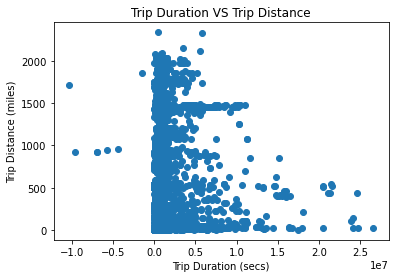

In [218]:
plt.scatter(df['Duration'], df['Org_Dest_distance'])
plt.title('Trip Duration VS Trip Distance')
plt.xlabel('Trip Duration (secs)')
plt.ylabel('Trip Distance (miles)')
plt.show()

In [219]:
df['speed'] = (df['Org_Dest_distance'] * 3600)//df['Duration']

In [220]:
df.head()

,BookingID_Date,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Planned_ETA,actual_eta,Orgin_lat,Orgin_lon,Destination_lat,Destination_lon,Duration,speed
148,2020-08-26 12:03:46.000,2020-08-28 12:15:10,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,390.500000,1,Maharashtra,Tamil Nadu,913.711784,2020-08-30 16:03:46.000,2020-08-28 12:48:07.380,18.750621,73.87719,12.930429,79.931163,160327.380,20.0
149,2020-08-27 15:21:48.570,2020-08-28 11:35:40,12.768090,80.026660,2020-08-27 15:21:06,2020-08-27 15:21:54.947,406.500000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 19:21:48.570,2020-08-28 12:13:51.543,12.8390,79.9540,12.8390,79.9540,75165.543,0.0
150,2020-08-27 14:22:17.833,2020-08-28 11:25:38,12.835262,79.952533,2020-08-27 14:21:21,2020-08-27 14:22:25.037,405.750000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 18:22:17.833,2020-08-28 11:33:19.043,12.8390,79.9540,12.8390,79.9540,76318.043,0.0
151,2020-08-28 00:32:20.523,2020-08-28 11:25:37,12.839172,79.951355,2020-08-28 00:31:41,2020-08-28 00:32:24.213,396.916667,1,Tamil Nadu,Tamil Nadu,0.000000,2020-09-01 04:32:20.523,2020-08-28 11:31:29.780,12.8390,79.9540,12.8390,79.9540,39588.780,0.0
152,2020-08-26 09:55:08.000,2020-08-28 08:35:08,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,477.250000,1,Gujarat,Tamil Nadu,1401.232229,2020-08-30 13:55:08.000,2020-08-29 07:09:41.173,22.961777,72.094219,12.786517,79.975221,228881.173,22.0


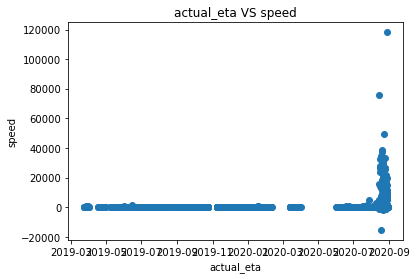

In [215]:
plt.scatter(df['actual_eta'], df['speed'])
plt.title('actual_eta VS speed')
plt.xlabel('actual_eta')
plt.ylabel('speed')
plt.show()

In [222]:
df.drop(columns=['BookingID_Date'], inplace=True)

In [224]:
df

,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Planned_ETA,actual_eta,Orgin_lat,Orgin_lon,Destination_lat,Destination_lon,Duration,speed
148,2020-08-28 12:15:10,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,390.500000,1,Maharashtra,Tamil Nadu,913.711784,2020-08-30 16:03:46.000,2020-08-28 12:48:07.380,18.750621,73.87719,12.930429,79.931163,158350.000,20.0
149,2020-08-28 11:35:40,12.768090,80.026660,2020-08-27 15:21:06,2020-08-27 15:21:54.947,406.500000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 19:21:48.570,2020-08-28 12:13:51.543,12.8390,79.9540,12.8390,79.9540,48.947,0.0
150,2020-08-28 11:25:38,12.835262,79.952533,2020-08-27 14:21:21,2020-08-27 14:22:25.037,405.750000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 18:22:17.833,2020-08-28 11:33:19.043,12.8390,79.9540,12.8390,79.9540,64.037,0.0
151,2020-08-28 11:25:37,12.839172,79.951355,2020-08-28 00:31:41,2020-08-28 00:32:24.213,396.916667,1,Tamil Nadu,Tamil Nadu,0.000000,2020-09-01 04:32:20.523,2020-08-28 11:31:29.780,12.8390,79.9540,12.8390,79.9540,43.213,0.0
152,2020-08-28 08:35:08,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,477.250000,1,Gujarat,Tamil Nadu,1401.232229,2020-08-30 13:55:08.000,2020-08-29 07:09:41.173,22.961777,72.094219,12.786517,79.975221,157560.000,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2020-08-14 13:45:10,21.067802,72.978950,2020-08-08 15:10:45,2020-08-15 02:40:21.237,1044.000000,0,Karnataka,Rajasthan,1573.480756,2020-08-09 23:53:10.000,2020-08-15 02:40:21.237,12.722686,77.676518,26.2389,73.0243,559776.237,10.0
1355,2020-08-14 14:25:12,12.966213,77.582370,2020-08-08 15:10:44,2020-08-15 01:04:01.580,1202.416667,0,Karnataka,Telangana,549.735797,2020-08-09 02:11:16.000,2020-08-15 01:04:01.580,12.722686,77.676518,17.603892,78.629944,553997.580,3.0
1357,2020-08-10 19:35:12,17.383795,78.474892,2020-08-06 21:25:41,2020-08-14 16:46:07.273,1433.333333,0,Karnataka,Telangana,511.106229,2020-08-07 08:00:32.000,2020-08-14 16:46:07.273,12.722686,77.676518,17.336504,77.904813,674426.273,2.0
1363,2020-08-08 08:15:08,14.688184,77.597959,2020-08-07 17:20:10,2020-08-14 02:39:34.687,1225.000000,0,Karnataka,Andhra Pradesh,160.261116,2020-08-07 21:12:17.000,2020-08-14 02:39:34.687,12.722686,77.676518,14.165574,77.807421,551964.687,1.0
